In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#!pip install split-folders

In [2]:
path = "../dataset/"
print(len(os.listdir(path)))

2350


In [3]:
import splitfolders
splitfolders.ratio("../dataset/", output="../dataset/split_data/", seed=1337, ratio=(.6, .3, .1))

In [4]:
dataset_dir = '../dataset/split_data/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [5]:
image_width = 32
image_height = 32

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 141000 images belonging to 2350 classes.
Found 70500 images belonging to 2350 classes.
Found 23500 images belonging to 2350 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    break

In [8]:
labels_list = train_generator.class_indices
labels_list

{'가': 0,
 '각': 1,
 '간': 2,
 '갇': 3,
 '갈': 4,
 '갉': 5,
 '갊': 6,
 '감': 7,
 '갑': 8,
 '값': 9,
 '갓': 10,
 '갔': 11,
 '강': 12,
 '갖': 13,
 '갗': 14,
 '같': 15,
 '갚': 16,
 '갛': 17,
 '개': 18,
 '객': 19,
 '갠': 20,
 '갤': 21,
 '갬': 22,
 '갭': 23,
 '갯': 24,
 '갰': 25,
 '갱': 26,
 '갸': 27,
 '갹': 28,
 '갼': 29,
 '걀': 30,
 '걋': 31,
 '걍': 32,
 '걔': 33,
 '걘': 34,
 '걜': 35,
 '거': 36,
 '걱': 37,
 '건': 38,
 '걷': 39,
 '걸': 40,
 '걺': 41,
 '검': 42,
 '겁': 43,
 '것': 44,
 '겄': 45,
 '겅': 46,
 '겆': 47,
 '겉': 48,
 '겊': 49,
 '겋': 50,
 '게': 51,
 '겐': 52,
 '겔': 53,
 '겜': 54,
 '겝': 55,
 '겟': 56,
 '겠': 57,
 '겡': 58,
 '겨': 59,
 '격': 60,
 '겪': 61,
 '견': 62,
 '겯': 63,
 '결': 64,
 '겸': 65,
 '겹': 66,
 '겻': 67,
 '겼': 68,
 '경': 69,
 '곁': 70,
 '계': 71,
 '곈': 72,
 '곌': 73,
 '곕': 74,
 '곗': 75,
 '고': 76,
 '곡': 77,
 '곤': 78,
 '곧': 79,
 '골': 80,
 '곪': 81,
 '곬': 82,
 '곯': 83,
 '곰': 84,
 '곱': 85,
 '곳': 86,
 '공': 87,
 '곶': 88,
 '과': 89,
 '곽': 90,
 '관': 91,
 '괄': 92,
 '괆': 93,
 '괌': 94,
 '괍': 95,
 '괏': 96,
 '광': 97,
 '괘': 98,
 '괜': 99,
 '괠': 100,

In [9]:
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: '가',
 1: '각',
 2: '간',
 3: '갇',
 4: '갈',
 5: '갉',
 6: '갊',
 7: '감',
 8: '갑',
 9: '값',
 10: '갓',
 11: '갔',
 12: '강',
 13: '갖',
 14: '갗',
 15: '같',
 16: '갚',
 17: '갛',
 18: '개',
 19: '객',
 20: '갠',
 21: '갤',
 22: '갬',
 23: '갭',
 24: '갯',
 25: '갰',
 26: '갱',
 27: '갸',
 28: '갹',
 29: '갼',
 30: '걀',
 31: '걋',
 32: '걍',
 33: '걔',
 34: '걘',
 35: '걜',
 36: '거',
 37: '걱',
 38: '건',
 39: '걷',
 40: '걸',
 41: '걺',
 42: '검',
 43: '겁',
 44: '것',
 45: '겄',
 46: '겅',
 47: '겆',
 48: '겉',
 49: '겊',
 50: '겋',
 51: '게',
 52: '겐',
 53: '겔',
 54: '겜',
 55: '겝',
 56: '겟',
 57: '겠',
 58: '겡',
 59: '겨',
 60: '격',
 61: '겪',
 62: '견',
 63: '겯',
 64: '결',
 65: '겸',
 66: '겹',
 67: '겻',
 68: '겼',
 69: '경',
 70: '곁',
 71: '계',
 72: '곈',
 73: '곌',
 74: '곕',
 75: '곗',
 76: '고',
 77: '곡',
 78: '곤',
 79: '곧',
 80: '골',
 81: '곪',
 82: '곬',
 83: '곯',
 84: '곰',
 85: '곱',
 86: '곳',
 87: '공',
 88: '곶',
 89: '과',
 90: '곽',
 91: '관',
 92: '괄',
 93: '괆',
 94: '괌',
 95: '괍',
 96: '괏',
 97: '광',
 98: '괘',
 99: '괜',
 100: '괠',

In [10]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

['DejaVu Sans', 'STIXSizeTwoSym', 'DejaVu Serif Display', 'DejaVu Serif', 'STIXSizeThreeSym', 'cmss10', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans Mono', 'cmsy10', 'STIXGeneral', 'DejaVu Sans Mono', 'cmb10', 'DejaVu Sans Display', 'cmex10', 'cmr10', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'cmmi10', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXSizeFourSym', 'STIXSizeOneSym', 'cmtt10', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'MS Reference Sans Serif', 'NanumBarunGothic', 'Eras Light ITC', 'Lucida Fax', 'Dancing Script', 'Rockwell', 'Niagara Solid', 'Cooper Black', 'Gadugi', 'NanumSquare', 'MaruBuri', 'Cambria', 'Franklin Gothic Medium Cond', 'Lucida Handwriting', 'Century Schoolbook', 'Segoe UI', 'Bodoni MT', 'MT Extra', 'Monotype Corsiva', 'Consolas', 'Lucida Sans Typewriter', 'Verdana', 'Arial R

In [11]:
plt.rc('font', family='Malgun Gothic')

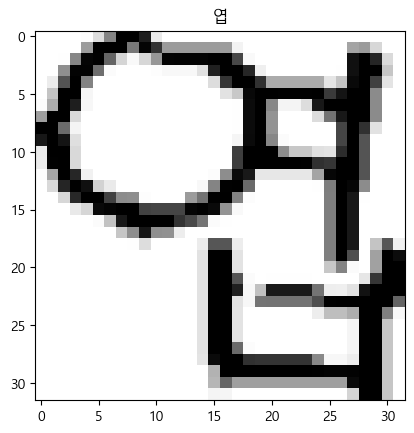

In [12]:
image = data_batch[0]

plt.imshow(image)
plt.title(labels_list[np.argmax(labels_batch[0])])
plt.show()

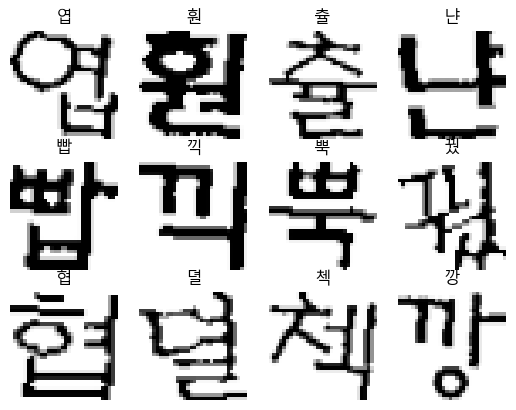

In [13]:
rows = 3
columns = 4

for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', 
                        input_shape=(image_width, image_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   
#model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(2350, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])   

In [20]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=141000 / 64,
                              epochs=500,
                              validation_data=validation_generator,
                              validation_steps=70500 / 64)

Epoch 1/500


C:\Users\ejlee\AppData\Local\Temp\ipykernel_9472\3093527373.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


2203/2203 [==============================] - 247s 112ms/step - loss: 7.7734 - accuracy: 2.9775e-04 - val_loss: 7.7680 - val_accuracy: 3.9701e-04
Epoch 2/500
2203/2203 [==============================] - 197s 90ms/step - loss: 6.7372 - accuracy: 0.0239 - val_loss: 4.0734 - val_accuracy: 0.1426
Epoch 3/500
2203/2203 [==============================] - 198s 90ms/step - loss: 2.5948 - accuracy: 0.3292 - val_loss: 1.1523 - val_accuracy: 0.6209
Epoch 4/500
2203/2203 [==============================] - 202s 92ms/step - loss: 0.9628 - accuracy: 0.6800 - val_loss: 0.4862 - val_accuracy: 0.8280
Epoch 5/500
2203/2203 [==============================] - 202s 92ms/step - loss: 0.5297 - accuracy: 0.8204 - val_loss: 0.2475 - val_accuracy: 0.9184
Epoch 6/500
2203/2203 [==============================] - 200s 91ms/step - loss: 0.3514 - accuracy: 0.8850 - val_loss: 0.1549 - val_accuracy: 0.9545
Epoch 7/500
2203/2203 [==============================] - 202s 92ms/step - loss: 0.2654 - accuracy: 0.9149 - val_los

2203/2203 [==============================] - 158s 72ms/step - loss: 0.1502 - accuracy: 0.9641 - val_loss: 0.1012 - val_accuracy: 0.9864
Epoch 57/500
2203/2203 [==============================] - 197s 89ms/step - loss: 0.1511 - accuracy: 0.9647 - val_loss: 0.0791 - val_accuracy: 0.9861
Epoch 58/500
2203/2203 [==============================] - 163s 74ms/step - loss: 0.1597 - accuracy: 0.9628 - val_loss: 0.0853 - val_accuracy: 0.9875
Epoch 59/500
2203/2203 [==============================] - 165s 75ms/step - loss: 0.1555 - accuracy: 0.9640 - val_loss: 0.0801 - val_accuracy: 0.9867
Epoch 60/500
2203/2203 [==============================] - 162s 74ms/step - loss: 0.1525 - accuracy: 0.9660 - val_loss: 0.0864 - val_accuracy: 0.9885
Epoch 61/500
2203/2203 [==============================] - 162s 74ms/step - loss: 0.1609 - accuracy: 0.9651 - val_loss: 0.0719 - val_accuracy: 0.9881
Epoch 62/500
2203/2203 [==============================] - 165s 75ms/step - loss: 0.1571 - accuracy: 0.9645 - val_loss: 

Epoch 111/500
2203/2203 [==============================] - 165s 75ms/step - loss: 0.1798 - accuracy: 0.9650 - val_loss: 0.1067 - val_accuracy: 0.9874
Epoch 112/500
2203/2203 [==============================] - 166s 75ms/step - loss: 0.1687 - accuracy: 0.9671 - val_loss: 0.1075 - val_accuracy: 0.9887
Epoch 113/500
2203/2203 [==============================] - 171s 78ms/step - loss: 0.1780 - accuracy: 0.9650 - val_loss: 0.1316 - val_accuracy: 0.9867
Epoch 114/500
2203/2203 [==============================] - 165s 75ms/step - loss: 0.1843 - accuracy: 0.9655 - val_loss: 0.1555 - val_accuracy: 0.9674
Epoch 115/500
2203/2203 [==============================] - 165s 75ms/step - loss: 0.1732 - accuracy: 0.9659 - val_loss: 0.1469 - val_accuracy: 0.9889
Epoch 116/500
2203/2203 [==============================] - 164s 74ms/step - loss: 0.1857 - accuracy: 0.9650 - val_loss: 0.0931 - val_accuracy: 0.9865
Epoch 117/500
2203/2203 [==============================] - 163s 74ms/step - loss: 0.1712 - accuracy:

2203/2203 [==============================] - 461s 209ms/step - loss: 0.1983 - accuracy: 0.9624 - val_loss: 0.1177 - val_accuracy: 0.9881
Epoch 166/500
2203/2203 [==============================] - 467s 212ms/step - loss: 0.2116 - accuracy: 0.9615 - val_loss: 0.1190 - val_accuracy: 0.9872
Epoch 167/500
2203/2203 [==============================] - 465s 211ms/step - loss: 0.1945 - accuracy: 0.9626 - val_loss: 0.1519 - val_accuracy: 0.9830
Epoch 168/500
2203/2203 [==============================] - 491s 223ms/step - loss: 0.1885 - accuracy: 0.9636 - val_loss: 0.1226 - val_accuracy: 0.9822
Epoch 169/500
2203/2203 [==============================] - 467s 212ms/step - loss: 0.1931 - accuracy: 0.9629 - val_loss: 0.1575 - val_accuracy: 0.9845
Epoch 170/500
2203/2203 [==============================] - 467s 212ms/step - loss: 0.1917 - accuracy: 0.9637 - val_loss: 0.1284 - val_accuracy: 0.9827
Epoch 171/500
2203/2203 [==============================] - 467s 212ms/step - loss: 0.1928 - accuracy: 0.9629

2203/2203 [==============================] - 476s 216ms/step - loss: 0.2134 - accuracy: 0.9631 - val_loss: 0.1547 - val_accuracy: 0.9864
Epoch 220/500
2203/2203 [==============================] - 481s 219ms/step - loss: 0.2052 - accuracy: 0.9652 - val_loss: 0.1453 - val_accuracy: 0.9851
Epoch 221/500
2203/2203 [==============================] - 476s 216ms/step - loss: 0.1950 - accuracy: 0.9664 - val_loss: 0.1240 - val_accuracy: 0.9857
Epoch 222/500
2203/2203 [==============================] - 469s 212ms/step - loss: 0.2025 - accuracy: 0.9641 - val_loss: 0.1425 - val_accuracy: 0.9889
Epoch 223/500
2203/2203 [==============================] - 475s 215ms/step - loss: 0.2094 - accuracy: 0.9638 - val_loss: 0.1326 - val_accuracy: 0.9819
Epoch 224/500
2203/2203 [==============================] - 481s 218ms/step - loss: 0.2132 - accuracy: 0.9634 - val_loss: 0.1267 - val_accuracy: 0.9893
Epoch 225/500
2203/2203 [==============================] - 471s 213ms/step - loss: 0.2116 - accuracy: 0.9639

2203/2203 [==============================] - 162s 73ms/step - loss: 0.2297 - accuracy: 0.9620 - val_loss: 0.1620 - val_accuracy: 0.9855
Epoch 274/500
2203/2203 [==============================] - 161s 73ms/step - loss: 0.2236 - accuracy: 0.9632 - val_loss: 0.1325 - val_accuracy: 0.9875
Epoch 275/500
2203/2203 [==============================] - 156s 71ms/step - loss: 0.2132 - accuracy: 0.9640 - val_loss: 0.1455 - val_accuracy: 0.9884
Epoch 276/500
2203/2203 [==============================] - 199s 90ms/step - loss: 0.2331 - accuracy: 0.9623 - val_loss: 0.1722 - val_accuracy: 0.9841
Epoch 277/500
2203/2203 [==============================] - 161s 73ms/step - loss: 0.2231 - accuracy: 0.9642 - val_loss: 0.1728 - val_accuracy: 0.9787
Epoch 278/500
2203/2203 [==============================] - 170s 77ms/step - loss: 0.2389 - accuracy: 0.9630 - val_loss: 0.2231 - val_accuracy: 0.9692
Epoch 279/500
2203/2203 [==============================] - 168s 76ms/step - loss: 0.2436 - accuracy: 0.9598 - val_

2203/2203 [==============================] - 559s 253ms/step - loss: 0.2441 - accuracy: 0.9612 - val_loss: 0.1681 - val_accuracy: 0.9820
Epoch 328/500
2203/2203 [==============================] - 556s 252ms/step - loss: 0.2367 - accuracy: 0.9618 - val_loss: 0.1389 - val_accuracy: 0.9849
Epoch 329/500
2203/2203 [==============================] - 557s 253ms/step - loss: 0.2432 - accuracy: 0.9609 - val_loss: 0.1538 - val_accuracy: 0.9876
Epoch 330/500
2203/2203 [==============================] - 322s 145ms/step - loss: 0.2416 - accuracy: 0.9618 - val_loss: 0.1845 - val_accuracy: 0.9864
Epoch 331/500
2203/2203 [==============================] - 359s 163ms/step - loss: 0.2385 - accuracy: 0.9603 - val_loss: 0.1795 - val_accuracy: 0.9823
Epoch 332/500
2203/2203 [==============================] - 585s 266ms/step - loss: 0.2581 - accuracy: 0.9584 - val_loss: 0.1610 - val_accuracy: 0.9872
Epoch 333/500
2203/2203 [==============================] - 669s 304ms/step - loss: 0.2468 - accuracy: 0.9598

2203/2203 [==============================] - 655s 297ms/step - loss: 0.2394 - accuracy: 0.9613 - val_loss: 0.2347 - val_accuracy: 0.9776
Epoch 382/500
2203/2203 [==============================] - 657s 298ms/step - loss: 0.2521 - accuracy: 0.9613 - val_loss: 0.2076 - val_accuracy: 0.9828
Epoch 383/500
2203/2203 [==============================] - 678s 308ms/step - loss: 0.2340 - accuracy: 0.9639 - val_loss: 0.1507 - val_accuracy: 0.9876
Epoch 384/500
2203/2203 [==============================] - 654s 297ms/step - loss: 0.2501 - accuracy: 0.9608 - val_loss: 0.2014 - val_accuracy: 0.9789
Epoch 385/500
2203/2203 [==============================] - 684s 311ms/step - loss: 0.2447 - accuracy: 0.9625 - val_loss: 0.1569 - val_accuracy: 0.9875
Epoch 386/500
2203/2203 [==============================] - 677s 307ms/step - loss: 0.2430 - accuracy: 0.9621 - val_loss: 0.1983 - val_accuracy: 0.9862
Epoch 387/500
2203/2203 [==============================] - 677s 307ms/step - loss: 0.2530 - accuracy: 0.9629

2203/2203 [==============================] - 189s 86ms/step - loss: 0.2722 - accuracy: 0.9645 - val_loss: 0.2922 - val_accuracy: 0.9572
Epoch 436/500
2203/2203 [==============================] - 179s 81ms/step - loss: 0.2827 - accuracy: 0.9630 - val_loss: 0.1590 - val_accuracy: 0.9863
Epoch 437/500
2203/2203 [==============================] - 179s 81ms/step - loss: 0.2625 - accuracy: 0.9650 - val_loss: 0.2257 - val_accuracy: 0.9792
Epoch 438/500
2203/2203 [==============================] - 180s 82ms/step - loss: 0.2609 - accuracy: 0.9639 - val_loss: 0.1855 - val_accuracy: 0.9847
Epoch 439/500
2203/2203 [==============================] - 174s 79ms/step - loss: 0.2615 - accuracy: 0.9641 - val_loss: 0.2524 - val_accuracy: 0.9806
Epoch 440/500
2203/2203 [==============================] - 174s 79ms/step - loss: 0.2561 - accuracy: 0.9658 - val_loss: 0.2946 - val_accuracy: 0.9797
Epoch 441/500
2203/2203 [==============================] - 175s 80ms/step - loss: 0.2661 - accuracy: 0.9651 - val_

2203/2203 [==============================] - 223s 101ms/step - loss: 0.3050 - accuracy: 0.9629 - val_loss: 0.2464 - val_accuracy: 0.9830
Epoch 490/500
2203/2203 [==============================] - 222s 101ms/step - loss: 0.2661 - accuracy: 0.9673 - val_loss: 0.2255 - val_accuracy: 0.9853
Epoch 491/500
2203/2203 [==============================] - 222s 101ms/step - loss: 0.3126 - accuracy: 0.9632 - val_loss: 0.2409 - val_accuracy: 0.9769
Epoch 492/500
2203/2203 [==============================] - 222s 101ms/step - loss: 0.2754 - accuracy: 0.9649 - val_loss: 0.2368 - val_accuracy: 0.9840
Epoch 493/500
2203/2203 [==============================] - 223s 101ms/step - loss: 0.2781 - accuracy: 0.9650 - val_loss: 0.1939 - val_accuracy: 0.9843
Epoch 494/500
2203/2203 [==============================] - 221s 100ms/step - loss: 0.2875 - accuracy: 0.9650 - val_loss: 0.2236 - val_accuracy: 0.9848
Epoch 495/500
2203/2203 [==============================] - 224s 101ms/step - loss: 0.2972 - accuracy: 0.9651

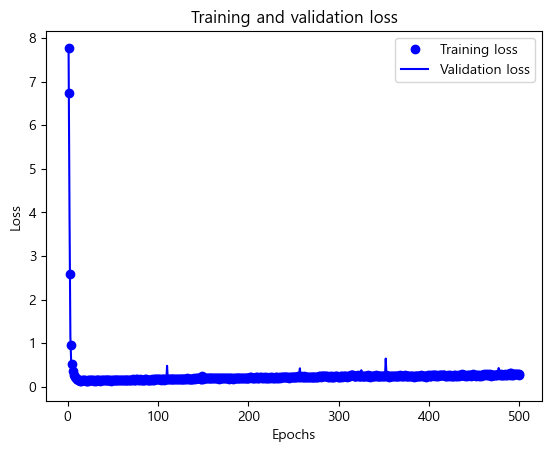

In [21]:
loss = history.history['loss']         
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

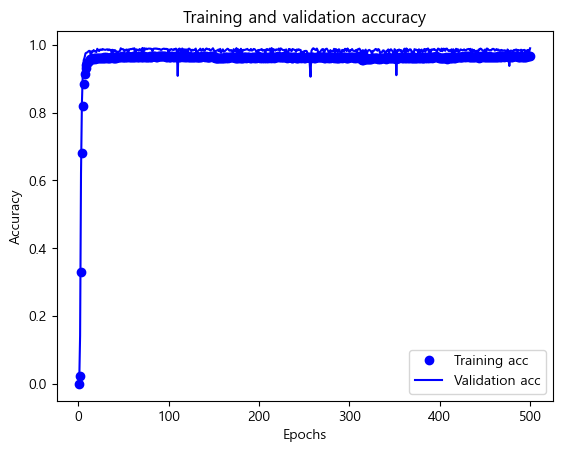

In [22]:
acc = history.history['accuracy']           
val_acc = history.history['val_accuracy']   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
model.save('../model/KoreanOCR_ver2.h5')